In [1]:
import numpy as np
import collections
import scipy
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def find_modes(sample):
  if (len(set(sample)) == len(sample)):
    return sample
  else:
    dict_sample = {}
    for i in sample:
      if i in dict_sample:
        dict_sample[i] += 1
      else:
        dict_sample[i] = 1
    mode = [(0, 0)]
    for i in dict_sample.keys():
      if dict_sample[i] == mode[0][1]:
        mode.append((i, dict_sample[i]))
      elif dict_sample[i] > mode[0][1]:
        mode = []
        mode.append((i, dict_sample[i]))
    return mode

In [3]:
def averages_density(x):
    return 1 / np.sqrt(2 * np.pi) * np.exp(-0.5 * ((x - 1) / 0.2) ** 2)

In [4]:
def median_density(x):
    return 67603900 * (1 - np.exp(-x)) ** 12 * (np.exp(-x)) ** 13

Генерация выборки

In [5]:
sample = np.random.exponential(size=25)
sorted_sample = sorted(sample)

Моды

In [16]:
modes = find_modes(sorted_sample)
print(*modes, sep='\n')

0.03502565828953456
0.0590817178700316
0.15055550976761548
0.1536408721677233
0.15929991800239007
0.26648085049306486
0.28635926890582963
0.39725222215493416
0.42157947285962105
0.48924151778453295
0.5935232493303835
0.7476617396490607
0.7901726678969572
0.9319450585610259
0.9522961306974582
1.0165323301209364
1.032493771335681
1.2453527200705676
1.288118782788771
1.3921464631636637
1.5729198224481689
1.671457665927126
2.6626969976379637
2.783060238548228
4.330884483739011


Медиана

In [7]:
median = np.median(sorted_sample)
print(median)

0.7901726678969572


Размах

In [8]:
sample_range = sorted_sample[-1] - sorted_sample[0]
print(sample_range)

4.295858825449476


Коэффициент ассимметрии

In [9]:
asymmetry_coefficient = scipy.stats.skew(sample)
print(asymmetry_coefficient)

1.7309923314260969


<Axes: >

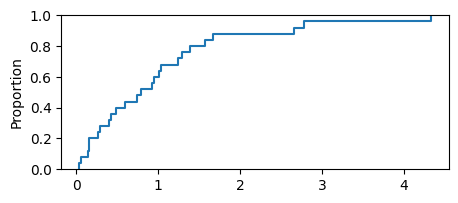

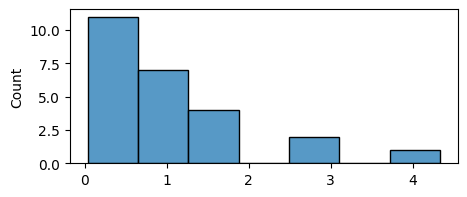

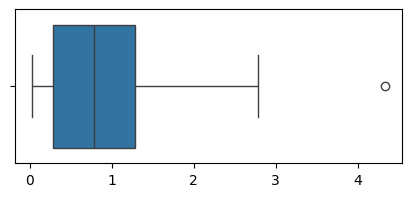

In [10]:
fig, ax = plt.subplots(figsize=(5, 2))
sns.ecdfplot(x = sample, ax = ax)
fig1, ax = plt.subplots(figsize=(5, 2))
sns.histplot(x = sample)
fig2, ax = plt.subplots(figsize=(5, 2))
sns.boxplot(x = sample)

Магия с бутстрапом

Для n = 1000

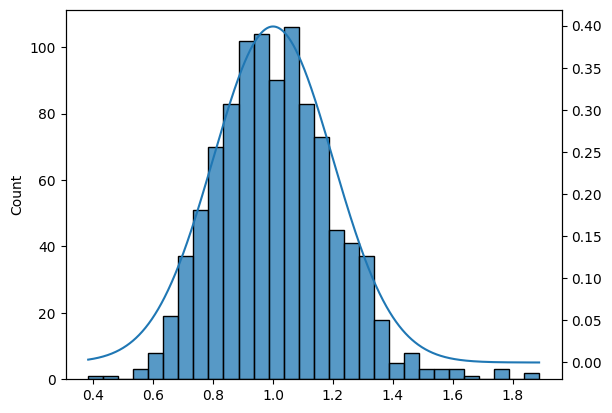

In [11]:
bootstrap_samples = [np.random.choice(np.array(sample), 25) for i in range(1000)]
bootstrap_samples_averages = np.array([np.average(array) for array in bootstrap_samples])

fig = plt.figure()
ax1 = fig.add_subplot()
ax2 = ax1.twinx()

x = np.linspace(np.min(bootstrap_samples_averages), np.max(bootstrap_samples_averages), 1000)
y = averages_density(x)

sns.histplot(x=bootstrap_samples_averages, ax=ax1)
sns.lineplot(x=x, y=y, ax=ax2)

plt.show()

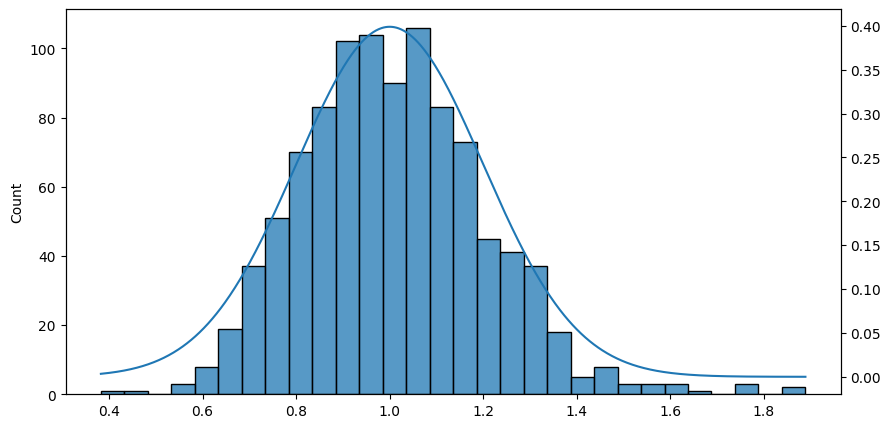

In [12]:
bootstrap_samples_median = np.array([np.median(array) for array in bootstrap_samples])

fig_s = plt.figure(figsize=(10, 5))
ax1_s = fig_s.add_subplot(111)
ax2_s = ax1_s.twinx()

x_s = np.linspace(np.min(bootstrap_samples_median), np.max(bootstrap_samples_median), 1000)
y_s = median_density(x)

sns.histplot(x=bootstrap_samples_averages, ax=ax1_s)
sns.lineplot(x=x, y=y, ax=ax2_s)

plt.show()